#### 이산형 확률분포 


In [101]:
# 1차원 이산확률분포 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_set = np.array([1,2,3,4,5,6])
#불공정한 주사위 
def f(x): 
    if x in x_set:
        return x/ 21
    else:
        return 0
    
X=[x_set,f]


In [102]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
#x_k와 p_k 대응을 사전식으로 표시
dict(zip(x_set,prob))
#x_set 확률변수에 대응되는 거 확률이잖아


[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

Text(0, 0.5, 'prob')

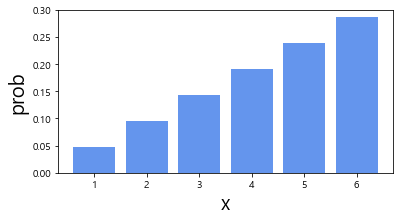

In [103]:
fig=plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
plt.bar(x_set,prob,color='cornflowerblue')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('prob',fontsize=20)

Text(0.5, 1.0, 'Bar Graph')

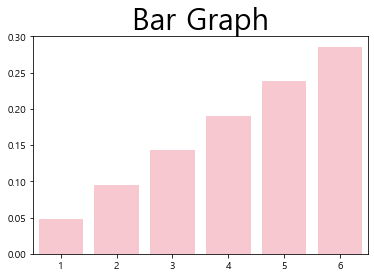

In [104]:
import seaborn as sns
sns.barplot(x_set,prob,color='pink')
plt.title('Bar Graph',fontsize=30)


In [105]:
np.all(prob>=0)


True

In [106]:
np.sum(prob)

0.9999999999999999

In [107]:
#누적분포함수 
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k<=x])
F(3)

0.2857142857142857

In [108]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 2X+3도 확률
#변수가 된다
y_set = np.array([2* x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [109]:
#1차원 이산형 확률변수의 지표
#평균: 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고 
#부른다
np.sum([x_k*f(x_k) for x_k in x_set])

4.333333333333333

In [110]:
#확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample =np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

4.332407

In [111]:
#일반화
def E(X,g=lambda x:x):
    x_set,f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])
E(X)

4.333333333333333

In [112]:
def E(x,g=lambda x:x)
    x_set,f =X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])
E(X)

SyntaxError: invalid syntax (Temp/ipykernel_11664/2417571912.py, line 1)

In [ ]:
E(X, g=lambda x: 2*x+3)

In [ ]:

#기댓값의 선형성
2*E(X)+3

In [ ]:
#분산
mean=E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
#일반화
def V(X,g=lambda x: x):
    x_set, f= X
    mean=E(X,g)
    return np.sum([g(x_k)-mean**2 * f(x_k) for x_k in x_set])
V(X)

In [ ]:
V(X,lambda x:2*x+3)

In [ ]:
#분산의 공식
2**2*V(X)

In [ ]:
#2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [ ]:
#확률변수 X,Y를 동시에 고려한 분포 결합: 결합확률분포
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y*(x-y)/441
    else:
        return 0


In [ ]:
XY = [x_set,y_set,f_XY]

In [ ]:
prob=np.array([[f_XY(x_i,y_j) for y_j in y_set]
              for x_i in x_set])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5,minor=False)
ax.set_xticklabels(np.arange(1,7),minor=False)
ax.set_yticklabels(np.arange(2,13),minor=False)
#Y축을 내림차순의 숫자가 되게 하여 위아래를 역전시킨다.
ax.invert_yaxis()#원래대로하면 12,11~2까지 있었음
#x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()  
fig.colorbar(c,ax=ax)
plt.show()

In [ ]:
ax.set_xticks(np.arange(prob.shape[1]+0.5,minor=False))
c-ax.pcolor

In [ ]:
np.all(prob>=0)

In [ ]:
np.sum(prob)

In [ ]:
#주변확률분포 : 확률변수(X,Y)는 결합확률분포에 의해 동시에 정의되지만
#개별 확률변수에만 흥미가 있을 수 있다.
#확률변수 X만의 움직임. 즉 확률변수 X의 확률함수를 알고 싶은 상황


In [ ]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [ ]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [ ]:

X = [x_set,f_X]
Y = [y_set,f_Y]

In [ ]:
X

In [ ]:
Y

In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X lable')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [ ]:
#2차원 이산형 확률분포의 자료
#기댓값
np.sum([x_i*f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
sum=0
for y_j in y_set:
    for x_i in x_set:
        sum+=x_i*f_XY(x_i,y_j)
sum

In [ ]:
#다중for문
def E(XY,g):
    x_set,y_set,f_XY=XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                for x_i in x_set for y_j in y_set])
                

In [ ]:
def E(XY,g):
    x_set,y_set,f_XY=XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])
mean_x = E(XY,lambda x,y:x)
mean_x

In [ ]:
mean_y = E(XY,lambda x,y:y)
mean_y

In [ ]:
# 기댓값의 선형성
a,b=2,3
E(XY,lambda x, y: a*x+b*y)

In [ ]:
a*mean_x + b*mean_y

In [ ]:
#분산의 함수
def V(XY,g):
    x_set,y_sey,f_XY=XY
    mean=E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2*f_XY(x_i,y_j)
                   for x_i in x_set for y_j in y_set])


In [ ]:

var_X =V(XY,g=lambda x,y: x)
var_X

In [ ]:
var_Y =V(XY,g= lambda x,y:y)
var_Y

In [ ]:
def Cov(XY):
    x_set,y_set, f_XY= XY
    mean_X =E(XY,lambda x,y:x)
    mean_Y = E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])
cov_xy = Cov(XY)
cov_xy    

In [ ]:
cov_xy = Cov(XY)
cov_xy

In [ ]:
V(XY,lambda x,y: a*x+b*y)

In [ ]:
a**2*var_X+b**2*var_Y+2*a*b*cov_xy


In [ ]:
#확률변수의 상관계수: 공분산을 각각의 표준편차로 나누어 산출
cov_xy/np.sqrt(var_X*var_Y)


#### 대표적인 이산형 확률분포

In [213]:
#assert: 원하는 조건의 변수 값을 보증받을 때까지 테스트
#그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
linestyles= ['-','--',':']
# x 확률변수의 기대값
def E(X,g=lambda x:x):
    x_set,f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
def V(X, g=lambda x:x):
    x_set,f = X
    mean =E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])
def check_prob(X): # 확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum ==1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X):#확률분포를 인수로 가지며 그 확률변수의 확률함수와 기대값
    #그리기 위한 함수
    x_set,f =X #확률변수와 확률함수
    prob= np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6,4))
    ax=fig.add_subplot(111)
    ax.bar(x_set,prob,label='prob')
    ax.vlines(E(X),0,1,label='mean',color='crimson')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()
    
    plt.show()
    

#### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
-  베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공,0이 나오면 실패
- 동전을 던져 앞면이 나올 확률,주사위를 한 번 굴려 6이 나오지 않을 확률

In [ ]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x) # p의 x승 곱하기 1-p에 1-x승
        # 확률변수 (x) ,(1-p)는 실패하는 확률에는 (1-x)승
        else:
            return 0
    return x_set,f
p=0.3
X=Bern(p)
X

In [ ]:
check_prob(X)

In [ ]:
plot_prob(X)

In [ ]:
rv=stats.bernoulli(p)


In [ ]:
#probability 
rv.pmf(0),rv.pmf(1) 


In [ ]:
rv.pmf([0,1])

In [ ]:
#누산분포함수 -이산형, 연속형 둘 다 가능
rv.cdf([0,1])

In [ ]:
rv.mean(),rv.var()

#### 이항분포 
- 성공확률이 p인 베르누이 시행을 n번 헀을 때의 성공 횟수가 따르는 분포
    f(x) = $_{n}\mathrm{C}_{x}(1-p)^{n-x}$ $(x \in \{0,1,2,,,,n\}$)
       0            (otherwise)


In [ ]:


from scipy.special import comb
def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f


In [ ]:

from scipy.special import comb
def Bin(n,p):
    x_set=np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        

In [ ]:
#[과제] 동전을 10번 던져 앞면이 3번 나올 확률의 이항분포의 기대값과 분산을
##구하시오.
n=10
p=0.3
X=Bin(n,p)
check_prob(X)

In [ ]:
# [과제] 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변화는 모습을 시각화 하세요

fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

x_set = np.arange(n+1)
for p,ls in zip([0.3,0.5,0.7],linestyles):
    # spicy.stats에서 이항분포의 확률변수는 binom함수로 생성가능 
    rv=stats.binom(n,p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='orange')
ax.set_xticks(x_set)
ax.legend()
plt.show()

#### 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 새행의 성공 확률 파라미터 P가 되며 
 파라미터 P의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,...\})$

     0              (otherwise)
- 기하분포의 기댓값과 분산 : E(X)=1/p,V(X) = (1-p)/$p^2$
    

In [ ]:
#[과제] 기하분포의 사용자 함수를 구하세요.(단, 확률변수를 1이상 29이하인 정수로 설정)
def Ge(p):
    x_set=np.arange(1,30)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set,f

In [ ]:
#[과제] 성공확률이 0.5일떄 기하분포의 기댓값과 분산을 구하세요
p = 0.5
X=Ge(p)
check_prob(X)

In [ ]:
#[과제] 상기 기하분포의 확률함수와 기댓값을 시각화하세요
plot_prob(X)

In [ ]:
#[과제] 성공 확률(p)이 0.2,.0.5,0.8로 변할 떄 확류함수가 변하는 모습 시각화

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

x_set = np.arange(1,14)
for p,ls in zip([0.2,0.5,0.8],linestyles):
    rv=stats.geom(p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='g')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [ ]:
# 야구선수가 홈런칠 확률 0.05, 6타석만에 홈런칠 확률은?
from scipy.stats import geom
rv =geom(p=0.05)
rv.pmf(6) #총 시도횟수

In [ ]:
rv=geom(p=0.05)
x =np.arange(1,91)
pmf_geom = rv.pmf(x)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,pmf_geom,'bo')
ax.vlines(x,0,pmf_geom,lw=2)
ax.set_ylabel('geom PMF')
plt.show()

#### 포아송 분포
-  임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의
 파라미터는 $\lambda$ (람다)로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.
   예) 하루에 교통사고가 한 건도 일어나지 않을 확률: 
    P(X=0) = 2!/0! * $e^{-2}$ = 0.135
    #e가 자연상수이고, 약 2.72818이다
- 포아송 분포의 기댓값과 분산 모두 $\lambda$ 가 된다.

In [ ]:
#[과제] 사용자 함수를 구하세요(단, 확률변수 1부터 19이하 정수로 설정)
from scipy.special import factorial
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x) *np.exp(-lam)
        else:
            return 0
        
    return x_set,f


In [ ]:
#[과제]  람다가 3일때 기댓값과 분산을 구하세요
lam=3
X=Poi(lam)
check_prob(X)

In [ ]:
#[과제]  상기 포아송분포의 확률함수와 기댓값을 시각화하세요
plot_prob(X)

In [ ]:
#[과제] 람다가 3,5,8로 변할 때 확률함수가 변하는 모습을 시각화
fig=plt.figure(figsize=(6,6))
ax =fig.add_subplot(111)

x_set = np.arange(20)
for lam,Is in zip([3,5,8],linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set,rv.pmf(x_set),
           label=f'lam:{lam}',ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [ ]:
#[과제] 베르누이.이항,기하,포아송분포의 사례를 각가 2개씩 제시하세요

In [ ]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x) # p의 x승 곱하기 1-p에 1-x승
        # 확률변수 (x) ,(1-p)는 실패하는 확률에는 (1-x)승
        else:
            return 0
    return x_set,f
p=0.3
X=Bern(p)
X
#베르누이는  x_set이 np.array([0,1]) 이여야한다

In [ ]:
#베르누이 주사위가 짝수가 나올 확률과 홀수가 나올 확률
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set,f

p=0.5
X=Bern(p)
check_prob(X)

In [ ]:
#베르누이 검은공 3개와 흰공 7개가 있는 주머니에서 흰공이 나오면 성공
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set,f

p=0.7
X=Bern(p)
check_prob(X)

In [ ]:
rv= stats.bernoulli(p)
rv.pmf(0),rv.pmf(1)

In [ ]:
plot_prob(X)

In [ ]:
#이항분포 15명의 환자에게 약을 투여해서 치료될 확률 0.7, 15명중 5명 환자가 치료될 확률
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f

n=5
p=0.7
X =Bin(n,p)
check_prob(X)

In [ ]:
from scipy.special import comb

n=5
p=0.7
def Bin(n,x,p):
    return comb(n,x)*p**x*(1-p)**(n-x)
result=[]
for x in range(1,n+1):
    result.append(Bin(n,x,p))
plt.bar(range(1,n+1),result)

In [ ]:
plot_prob(X)

In [ ]:
fig = plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for p,ls in zip([0.3,0.5,0.7],linestyles):
    rv=stats.binom(n,p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='g')
ax.set_xticks(x_set)
ax.legend()
plt.show()

In [ ]:


#이항분포 동전 100회 던져서 앞면이 60회 나올 확률 
from scipy.special import comb
def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*p**x*(1-p)**(n-x)
        else:
            return 0
    return x_set,f

n=100
p=0.5
X=Bin(n,p)
check_prob(X)

In [ ]:
#기하분포 : 처음 성공
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1)*p
        else:
            return 0
    return x_set,f
p=0.4
#0.4부터 0.9까지만 되네? WHY?
X=Ge(p)
check_prob(X)


In [ ]:
#기하분포는 geom 으로 확률변수를 받음 
fig = plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for p,ls in zip([0.3,0.5,0.7],linestyles):
    rv=stats.geom(p)
    ax.plot(x_set,rv.pmf(x_set),label=f'p:{p}',ls=ls,color='g')
ax.set_xticks(x_set)
ax.legend()
plt.show()

 ### 포아송분포
  
 f(x)=$\lambda^x/x!*3^{-\lambda}$ $(x \in \{1,2,3,...\})$
 
  0                 (otherwise)

In [ ]:
#포아송분포  임의의 사건이 단위 시간당 발생하는 건수
# 어떤 이발소에 1시간에 평균 3명의 손님이 찾아온다 
# 1시간에 4명이 찾아 올확률은
stats.poisson.cdf(4,mu=3)

In [ ]:
from scipy.special import factorial
def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/ factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set,f

lam=3
X=Poi(lam)

check_prob(X)


In [ ]:
plot_prob(X)

In [ ]:
#웹사이트 한시간당 평균 접속사 3명, 앞으로 1시간동안 접속자가 2명 이하일 확률은?

stats.poisson.cdf(2,mu=3)
#2보다 작을 떄 확률을 구하는 것 

In [ ]:
lam=3
X=Poi(lam)
check_prob(X)

In [ ]:
#람다가 커질수록 분산도 커져서 분포가 넓게 퍼지게 되는 것을 확인할 수 있습니다.
fig=plt.figure(figsize=(6,6))
ax =fig.add_subplot(111)

x_set = np.arange(20)
for lam,Is in zip([3,5,8],linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set,rv.pmf(x_set),
           label=f'lam:{lam}',ls=ls, color='black')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 연속형 확률변수
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.
- 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral모듈을 사용하여 구현한다.

### 연속형 확률분포와 확률밀도함수
- 특정값이 될 확률은 0, 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적의 크기)
- 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포, 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포
- 누적분포함수: 확률분포에서 얻은 확률변수 3 이하가 되는 확률. cumulative density function 
###  stats.norm.cdf(loc=4,scale=0.8,x=3)
- 정규분포의 확률밀도 계산
   * 확률변수 3일 때의 확률밀도 N(3|4, 0.8**2)
### stats.norm.pdf(loc=4,scale=0.8,x=3) 
Probability density function
- 하측확률 : '확률변수 x가 N보다 낮을 확률은 M퍼센트이다'에서 N을 고정하고 M을 구하는 경우 
    * 이 때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우*이때의 N이 퍼센트포인트 하측확률이 2.5%가 되는 퍼센트 포인트
- stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준정규분포가 됨. probability density function
- stats.norm.rvs()함수는 정규확률분포로 부터 난수 생성

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [198]:
x_range = np.array([0,1])

def f(x):
    if x_range[0]<= x <= x_range[1]:
        return 2*x
    else:
        return 0
X=[x_range,f]

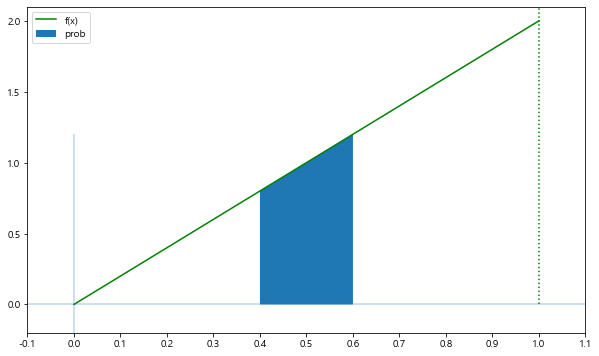

In [199]:
xs=np.linspace(x_range[0],x_range[1],100)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.plot(xs,[f(x) for x in xs],label ='f(x)',color='g')
ax.hlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(xs.max(),0,2.2,linestyles=':',color='g')
#0.4~0.6 x좌표를 setting
xs=np.linspace(0.4,0.6,100)
ax.fill_between(xs,[f(x) for x in xs],label='prob')

ax.set_xticks(np.arange(-0.2,1.3,0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.2,2.1)

ax.legend()

plt.show()

In [ ]:
#추정오차 인수는 피적분함수, 두번쨰 인수와 세번쨰 인수는 적분 범위
# quad함수는 적분값(면적)과 추정오차를 반환
#삼각형의 면적을 구할 때  quad함수를 사용해서 구할 수 있음
integrate.quad(f,0.4,0.6)

#### 연속형 확률변수에서는 확률의 성질이 수식을 만족해야 함
- f(x)가 항상 0이상의 값을 취함
- 확률은 0보다 커야되지 , f(x)라는게 확률함수잖아 
- f(x)에 대하여 무한대 범위의 적분 결과는 1




In [100]:
#확률밀도함수의 최소값
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은  fun이라는 인스턴스 변수에
res.fun

0

In [83]:
integrate.quad(f,-np.inf,np.inf)[0]

0.0

In [84]:
np.pi

3.141592653589793

In [85]:
#정규분포의 확률밀도 계산
# 확률변수 3일때의, 확률밀도 N(3/4.0,0.8**2)
x = 3 
mu = 4
sigma = 0.8

1/(np.sqrt(2*np.pi*sigma**2))*sp.exp(-((x-mu)**2)/(2*sigma**2))


0.22831135673627742

In [86]:
stats.norm.pdf(loc=4,scale=0.8,x=3) #x=3 퍼센트포인트라구?

0.2283113567362774

In [87]:
# Q.표준정규분포에서 확률변수가 x=1 일떄 확률밀도 구해보세요
#표준정규분포니깐 평균이 0, 표준편차가 1
stats.norm.pdf(loc=0,scale=1,x=1)

0.24197072451914337

In [88]:
def F(x):
    return integrate.quad(f,-np.inf,x)[0]
F(0.6)-F(0.4)

0.0

In [196]:
xs=np.linspace(x_range[0],x_range[1],100)


fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.plot(xs,[F(x) for x in xs],label='F(x)',color='g')
ax.hlines(0,-0.1,1.1,alpha=0.3)
ax.vlines(0,-0.1,1.1,alpha=0.3)
ax.vlines(xs.max(),0,1,linestyle=':',color='g')

ax.set_xticks(np.arange(-0.1,1.2,0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.legend()

plt.show()

NameError: name 'x_range' is not defined

Text(0.5, 1.0, '확률밀도함수')

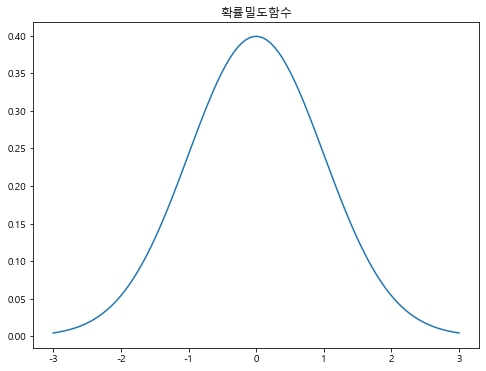

In [99]:
from matplotlib.pyplot import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
rv= stats.norm(loc=0,scale=1) #편차가 커지면 점점 더 벌어짐
xx= np.linspace(-3,3,100) #100개로 잘게 나눠준것
pdf =rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')

Text(0.5, 1.0, '누적분포함수')

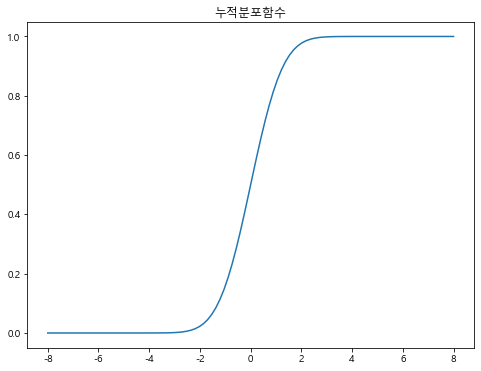

In [91]:
xx = np.linspace(-8,8,100)
cdf = rv.cdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,cdf)
plt.title('누적분포함수')

In [93]:
#정규분포 인스턴스 생성 
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

In [115]:
x_plot = np.arange(1,7.1,0.1)
x_plot

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [194]:
x_plot.std()

1.7606816861659025

Text(0.5, 1.0, '확률밀도함수')

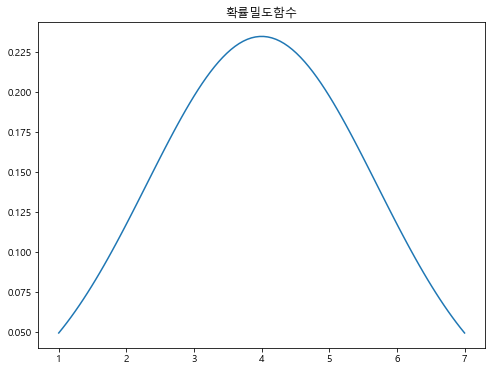

In [96]:
from matplotlib.pyplot import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
rv= stats.norm(loc=4,scale=1.7) #편차가 커지면 점점 더 벌어짐
xx= np.linspace(1,7,100) #100개로 잘게 나눠준것
pdf =rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')

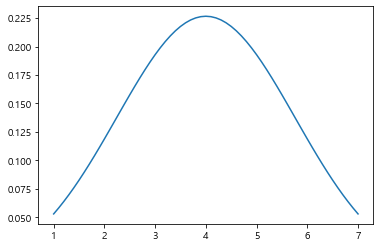

In [116]:
mean = x_plot.mean()
std = x_plot.std()

pdf=stats.norm(mean,std).pdf(x_plot)
plt.plot(x_plot,pdf)

In [235]:
# 표본이 어떤 값 이하가 되는  비율
np.random.seed(1)
simulated_sample= stats.norm.rvs(loc=4,scale=0.8,size=100000)
simulated_sample[:10]
ss=simulated_sample[:10]
ss

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [232]:
pd.Series(simulated_sample).describe()

count    100000.000000
mean          4.004202
std           0.798667
min           0.538490
25%           3.465533
50%           4.004800
75%           4.539819
max           7.334494
dtype: float64

In [247]:
# Q. 3보다 작은 샘플의 합계와 확률은?

a=pd.Series(simulated_sample)
print(a[a<3].sum())
len(a[a<=3])/len(ss)

27151.549504137874


1037.1

In [258]:
# 누적분포함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률(loc=4.scale=0.8)
stats.norm.cdf(loc=4,scale=0.8,x=3)


0.10564977366685535

In [261]:
#정규분포는 평균에 대해 좌우대칭 
#데이터가 평균값 이하가 될 확률은? 50% 
stats.norm.cdf(loc=4,scale=0.8,x=4)

0.5

In [266]:
# 하측확률: 확률변수 x가 N보다 작을 확률은 M퍼센트이다
# M을 고정하고 N을 구하는 경우 
# q: 하측확률이 주어졌을 때 퍼센트 포인트 구하는법
stats.norm.ppf(loc=4,scale=0.8,q=0.025)


2.4320288123679563

In [264]:
# x: 퍼센트 포인트 -> 하측확률 구하는 법 
stats.norm.cdf(loc=4,scale=0.8,x=2.4320288123679563)

0.024999999999999977

In [268]:
# 하측확률이 50%가 되는 퍼센트 포인트는 평균과 일치
stats.norm.ppf(loc=4,scale=0.8,q=0.5) 

4.0

In [117]:
#[과제] 평균 100, 표준편차 10인 정규분포에서 하측확률이 0.3일 경우의
#퍼센트포인트를 구하고 그 퍼센트 포인트를 적용해 하측확률 구하여라

stats.norm.ppf(loc=100,scale=10,q=0.3)

94.75599487291959

In [118]:
stats.norm.cdf(loc=100,scale=10,x= 94.75599487291959)

0.2999999999999998

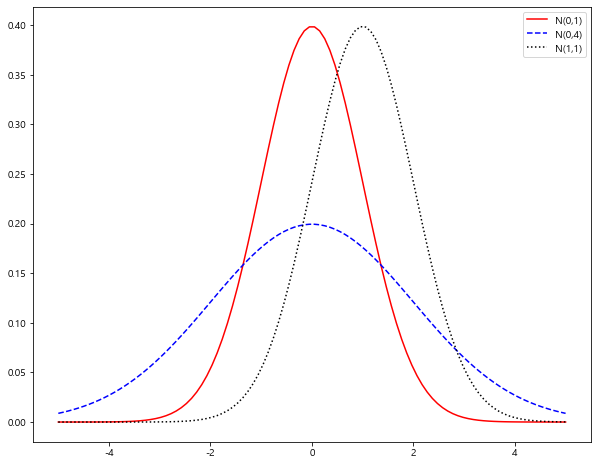

In [228]:
# [과제] N(mean, sigma**2) 파라미터를 각각 (0,1), (0,4), (1,1)로 변경할 때의 정규분포
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]
colors = ['red','blue','black']

for param, ls , color in zip(params,linestyles,colors):
    mu, sigma = param
    rv = stats.norm(mu,sigma)
    ax.plot(xs,rv.pdf(xs), label = f'N({mu},{sigma**2})',ls=ls,color=color)
    
ax.legend()
plt.show()


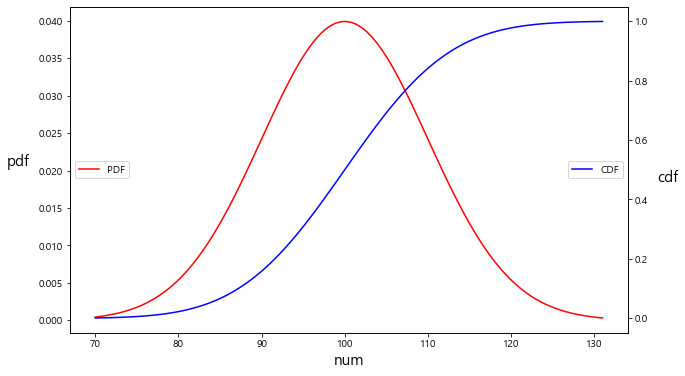

In [193]:
#[과제] 상기 정규분포의 확률밀도함수와 누적분포 함수를 시각화하여
#하측확률과 퍼센트포인트간의 관계를 확인하세요.
fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

rv = stats.norm(loc=100, scale=10)
xx = np.linspace(70,131,100)

pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

line_pdf = ax1.plot(xx,pdf,color='red',label='PDF')
ax1.set_xlabel('num',fontsize=15)
ax1.set_ylabel('pdf',rotation=0,fontsize=15,labelpad=20)

line_cdf = ax2.plot(xx,cdf,color='blue',label='CDF')
ax2.set_ylabel('cdf',rotation=0,fontsize=15,labelpad=20)

ax1.legend(loc='center left')
ax2.legend(loc='center right')
plt.show()


In [162]:
rv= stats.norm(0,1)

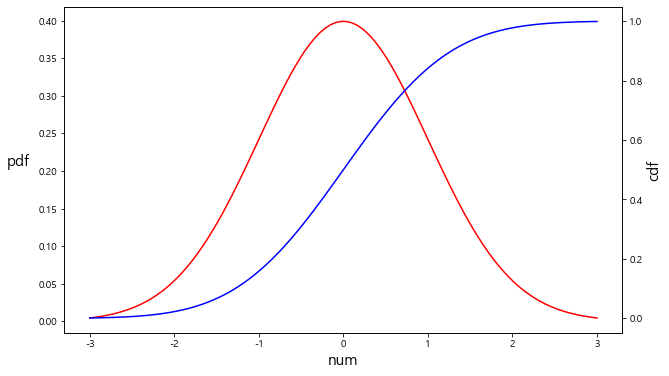

In [179]:
#Q.확률밀도함수(pdf)와 누적분포함수(cdf)를 하나의 그래프를 시각화하여 비교하세요

fig=plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

rv=stats.norm(loc=0,scale=1)
x =np.linspace(-3,3,100)
pdf = rv.pdf(x)
cdf = rv.cdf(x)

line_pdf = ax1.plot(x,pdf,color='red',label='PDF')
line_cdf = ax2.plot(x,cdf,color='blue',label='CDF')

ax1.set_xlabel('num',fontsize=15)
ax1.set_ylabel('pdf',rotation=0,fontsize=15,labelpad=20)
ax2.set_ylabel('cdf',fontsize=15)
plt.show()

누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)0.5


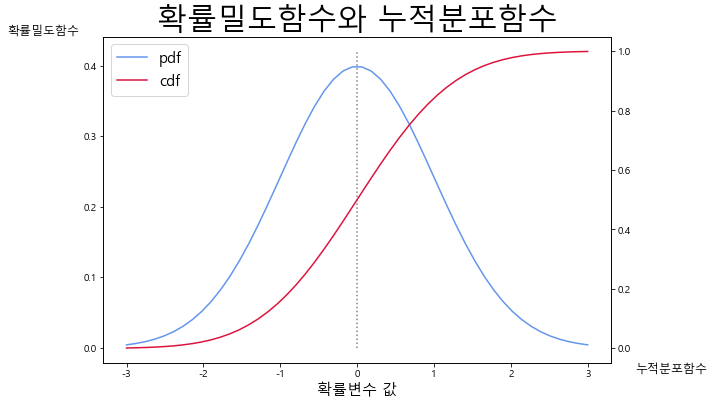

In [188]:
from matplotlib import rc
rc('font',family='Malgun Gothic') # 한글 인코딩
plt.rcParams['axes.unicode_minus'] = False # 음수 부분 처리

a = float(input('누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)'))
rv = stats.norm(0,1)
xx = np.linspace(-3,3)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('확률밀도함수',rotation=0,fontsize=12,loc='top')
ax1.set_xlabel('확률변수 값',fontsize=15)
ax1.vlines(rv.ppf(a),0,0.42,colors='gray',ls = ':')
lns1 = ax1.plot(xx,pdf,label='pdf',color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수',rotation=0,fontsize=12,loc='bottom')
lns2 = ax2.plot(xx,cdf,label='cdf',color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns,lab,loc='upper left',fontsize=15)

plt.title('확률밀도함수와 누적분포함수',fontsize=30)
plt.show()


In [144]:
# Q. 0까지 누적분포
rv.cdf(0)

0.5

In [180]:
# Q. 누적분포가 0.5인 X값
# ppf: 누적분포함수의 역함수
rv.ppf(0.5)

0.0

In [181]:
# 누적분포가 0.8413447460685429인 x값
rv.ppf(0.8413447460685429)

1.0

In [151]:
# Q. 0~1까지의 누적확률분포
rv.cdf(1)-rv.cdf(0)

0.3413447460685429

In [153]:
#  Q. (-2<x<2)확률
rv.cdf(2)-rv.cdf(-2)

0.9544997361036416

In [190]:
# 상위 5%확률의 퍼센트 포인트
rv.isf(0.05)
rv.ppf(0.95)

1.6448536269514722

In [191]:
# 하위 5%확률의 퍼센트 포인트
rv.ppf(0.05)
rv.isf(0.95)

-1.6448536269514722

In [192]:
#Q.하위5%, 상위5%의 퍼센트 포인트 (하위5,상위5 빼면 90%잖아)
rv.interval(0.9)

(-1.6448536269514729, 1.6448536269514722)

In [165]:
# Q.어느 회사에서 종업원들의 근무시간 조사하였는데 종업원들의 근무기간은 평균 11년
#표준편차가 4년인 정규분포를 따른다고 한다. 이 회사에서 14년이상 근무한 종업원의 비율은?
# stats.norm(loc=11,sigma=4)
# (X>=14)
rv= stats.norm(11,4)
1-rv.cdf(14)

0.22662735237686826

In [168]:
# Q. 어느 전구회사의 전구 수명은 평균 800일, 표준편차는 30일인 정규분포를 따른다.
#전구의 수명이 760이하일 확률을 구하세요.
rv=stats.norm(800,30)
rv.cdf(760)

0.09121121972586788

In [170]:
#Q. 어느 고3 학생들의 수학 성적 평균은 70점, 분산이 64점인 정규분포를 따른다.
#점수가 80점이상 90점 이하일 확률은?
rv=stats.norm(70,8)
rv.cdf(90)-rv.cdf(80)

0.09944010834107919

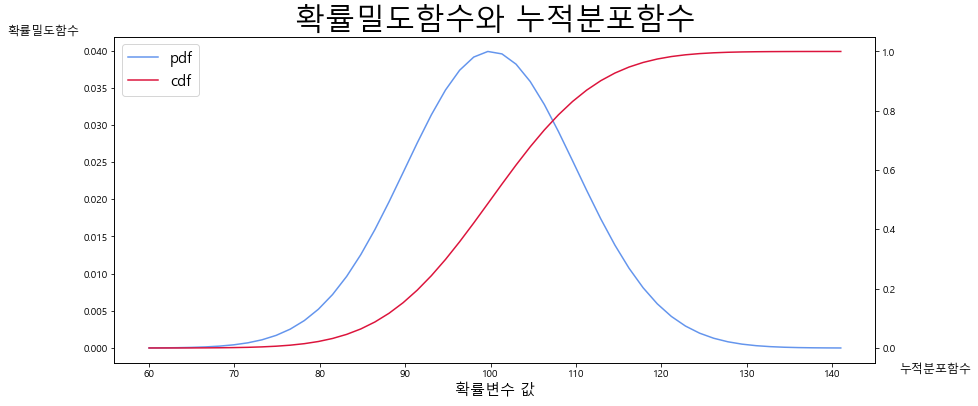

In [122]:
rv = stats.norm(loc = 100,scale = 10)
xx = np.linspace(60,141)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('확률밀도함수',rotation=0,fontsize=12,loc='top')
ax1.set_xlabel('확률변수 값',fontsize=15)
ax1.vlines(rv.ppf(a),0,0.05,colors='gray',ls = ':')
lns1 = ax1.plot(xx,pdf,label='pdf',color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수',rotation=0,fontsize=12,loc='bottom')
lns2 = ax2.plot(xx,cdf,label='cdf',color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns,lab,loc='upper left',fontsize=15)

plt.title('확률밀도함수와 누적분포함수',fontsize=30)
plt.show()


Text(0.5, 1.0, '확률밀도함수')

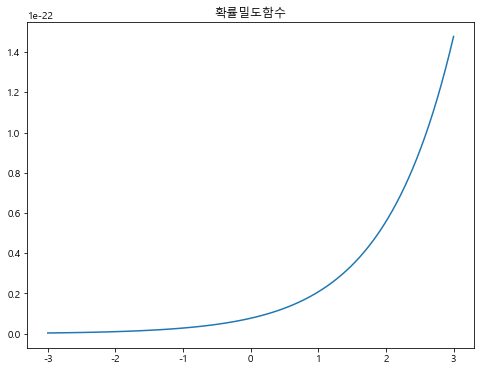

In [272]:
from matplotlib.pyplot import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

rv= stats.norm(loc=100,scale=10) #편차가 커지면 점점 더 벌어짐
xx= np.linspace(-3,3,100) #100개로 잘게 나눠준것
pdf =rv.pdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')

Text(0.5, 1.0, '확률누적함수')

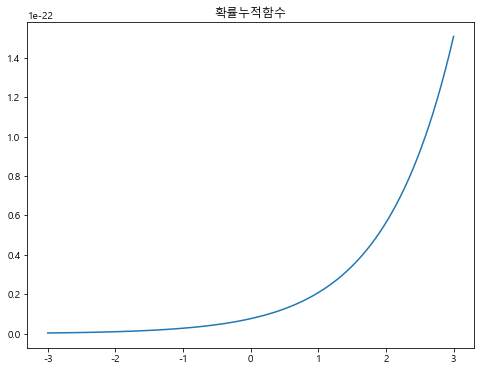

In [113]:
rv= stats.norm(loc=100,scale=10) #편차가 커지면 점점 더 벌어짐
xx= np.linspace(-3,3,100) #100개로 잘게 나눠준것
pdf =rv.cdf(xx)
plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률누적함수')

#코딩으로배우는 통계 블로그
https://makeit.tistory.com/category/%EC%BD%94%EB%94%A9%EC%9C%BC%EB%A1%9C%20%EC%9D%B5%ED%9E%88%EB%8A%94%20Python/%ED%86%B5%EA%B3%84

### 지수분포
어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0이상의 실수
지수분포의 파라미터는 로 양의 실수이며 EX()로 표기한다.
EX()는 단위시간당 평균 번 발생하는 사건의 발생 간격에 따르는 확률분포이다.

In [218]:
from scipy import stats, integrate
# from scipy

linestyels=['-','--',':']

def E(X, g=lambda x:x):
    x_range , f =X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf,np.inf)[0]

def V(X, g=lambda x:x):
    x_ragne, f =X
    mean = E(X,g)
    def integrand(x):
        return (g(x) - mean) **2 *f(x)
    return integrate.quad(integrand, -np.inf , np.inf)[0]

def check_prob(X):
    x_range , f =X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0 , 'density function is minus value'
    prob_sum = np.round(integrate.quad(f,-np.inf, np.inf)[0],6)
    assert prob_sum ==1 , f'sum of probability is {prob_sum}'
    print(f'expected value {E(X):.3f}')
    print(f'variance {V(X): .3f}')
    
def plot_prob(X,x_min,x_max):
    x_range, f =X
    def F(x):
        return integrate.quad(f,-np.inf,x)[0]
    xs = np.linspace(x_min,x_max,100)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs,[f(x) for x in xs], label='f(x)', color='rebeccapurple')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--',color='purple')
    ax.legend()

In [210]:
def Ex(lam):
    x_range = [0,np.inf]
    def f(x):
        if x >=0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [219]:
lam = 3
X = Ex(lam)
check_prob(X)

expected value 0.333
variance  0.111


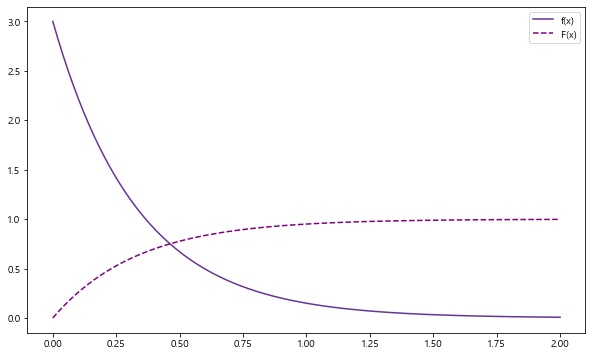

In [221]:
plot_prob(X,0,2)

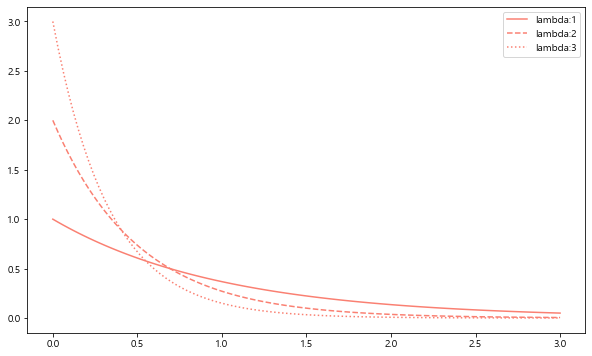

In [222]:
# [과제] 파라미터 람다가 1,2,3으로 변경시 지수분포의 확률분포함수를 시각화 하세요

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam,ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale =1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}' , ls=ls, color="salmon")
ax.legend()
plt.show()


### 카이제곱분포
- $Z_1,Z_2,...Z_n$ 이 서로 독립이고 N(0,1)을 따르고 있을 떄 그 제곱합의 확률분포을 자유도(샘플 개수)가 n인 카이제곱분포라고 한다.
- 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다.
-  좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.


In [239]:
#포본크기 10으로 백만번 무작위 추출하여 카이제곱분포를
#따르는 표본 데이터 만들기
n=10
rv=stats.norm()
sample_size=int(1e6)
#표준정규분포에서 표본크기 100만으로 무작위추출
z_sample=rv.rvs((n,sample_size))
print(z_sample.shape)
# axis=0에서 총합을 구하고, 표준정규분포의
#제곱합 표본 데이터를 구한다
chi2_sample= np.sum(z_sample**2,axis=0)
chi2_sample

(10, 1000000)


array([11.05116221, 10.5242263 ,  6.61151902, ..., 14.72159082,
       13.67140345,  9.5721032 ])

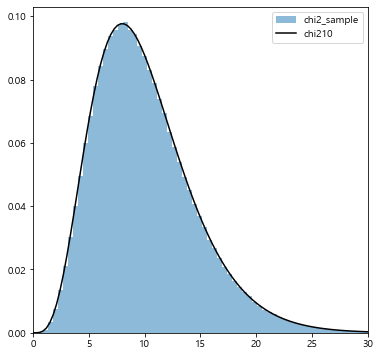

In [234]:
# 표본 데이터의 히스토그램과 밀도함수 시각화
fig =plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

rv_true=stats.chi2(n)
xs=np.linspace(0,30,100)
ax.hist(chi2_sample,bins=100,density=True,
       alpha=0.5,label='chi2_sample')
ax.plot(xs,rv_true.pdf(xs),label=f'chi2{n}',
       color='black')
ax.legend()
ax.set_xlim(0,30)
plt.show()

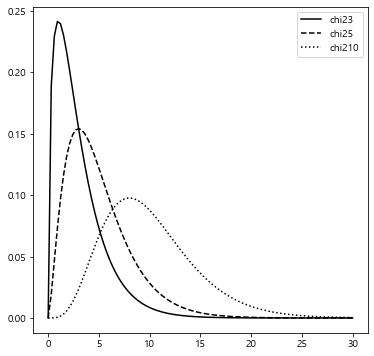

In [236]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)

xs=np.linspace(0,30,100)

for n,ls in zip([3,5,10],linestyles):
    rv=stats.chi2(n)
    ax.plot(xs,rv.pdf(xs),label=f'chi2{n}',
           ls=ls,color='black')
ax.legend()
plt.show()

In [242]:
rv=stats.chi2(5)
rv.isf(0.05)

11.070497693516355

In [245]:
#Q. χ**2 분포에서 자유도가 17인 χ**2 분포의 
#상, 하위 5%의 확률을 주는 값을 찾아라.
rv=stats.chi2(17)
rv.interval(0.9)

(8.671760204670077, 27.58711163827534)

- 정규분포에서는 데이터들이 얼마나 치우쳐져있는지를 평균표준편차로만 알기 때문에, 치우쳐짐의 정도를 정확히 모르기 때문에, 카이제곱분포를 통해 분산의 가설검정, 신뢰구간으로 검정하는데 사용한다.
- 카이제곱분포의 95%예언적중구간을 이용하여 모분산을 구간추정 할 수 있게 된다.
- 모평균을 모를때 // 모평균을 알 때, 둘 다 모분산 구간추정이 가능하다.



In [246]:
rv=stats.chi2(3)
rv.isf(9.1)

nan

In [251]:
# 확률변수X 가 X**2(20)을 따를 떄 P(9.5<X<34)를
#구하여라
rv=stats.chi2(20)
rv.cdf(34)-rv.cdf(9)

0.9567825802959631

#### t분포
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포
- 확률변수 Z,Y는 서로 독립이고 Z은 표준정규분포 N(0,1)을 Y는 자유도가 n인
카이제곱 분포 $\chi^2(n)$ 를 따를 때  t= ${Z}\over{\sqrt{{Y}\over{n}}}$ 의 확률분포를 자유도가 n인 t분포라고한다.
- t분포의 의미
 * 모분산을 모르는 상황에서도 표본평균의 분포에 대하여 얘기할 수 있다.
 * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함
 * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t분포의 특성
 * t분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설검정에 아주 유용하게 쓰이는 분포이다.
 * t분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
 *  t분포는 꼬리는 표준정규분포 보다 두껍다(fat tail)
 * t분포는 자유도 n에 따라 모습이 변하는데 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않을 경우 표본 분포를 결정할 때 표본의 크기가 30이하면 t분포를 그 크기가 30이상이면 표준정규분포를 이용한다.
 
 


In [254]:
n=10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size=int(1e6)
z_sample =rv1.rvs(sample_size)
chi2_sample=rv2.rvs(sample_size)

t_sample =z_sample/np.sqrt(chi2_sample/n)


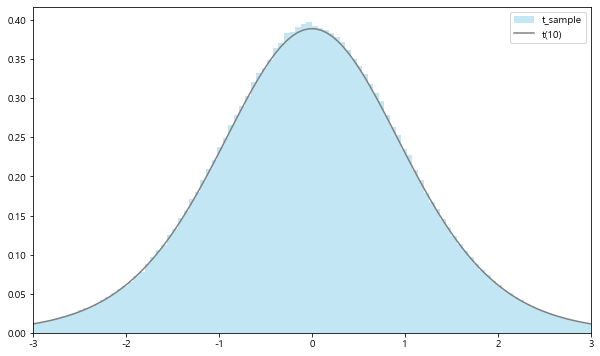

In [265]:
#표본데이터의 히스토그램과 밀도함수를 그리시오
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs=np.linspace(-3,3,100)
rv = stats.t(n)
ax.hist(t_sample,bins=100,range=(-3,3),density=True,alpha=0.5,
        label='t_sample',color='skyblue')
ax.plot(xs,rv.pdf(xs),label=f't({n})',color='gray')
ax.legend()
ax.set_xlim(-3,3)
plt.show()

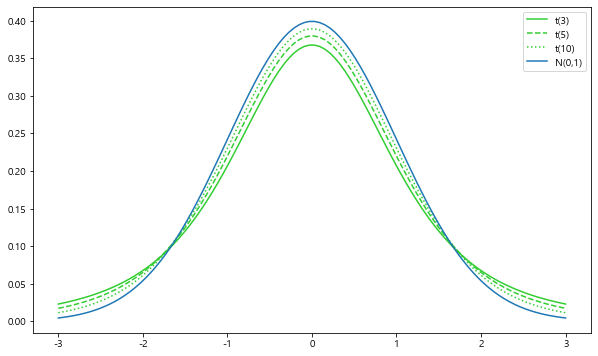

In [276]:
#자유도 n을 3,5,10으로 변화시켜 그려보기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs=np.linspace(-3,3,100)
for n,ls in zip([3,5,10],linestyles):
    rv=stats.t(n)
    ax.plot(xs,rv.pdf(xs),label=f't({n})',ls=ls,color='limegreen')
rv=stats.norm()
ax.plot(xs,rv.pdf(xs),label='N(0,1)')
ax.legend()
plt.show()

In [277]:
rv=stats.t(5)
rv.isf(0.05)

2.0150483726691575

In [287]:
#확률변수T가 자유도 4인 T분포를 따를 떄 P(T>t)=0.05가 성립하는  t값은?
rv =stats.t(4)
rv.isf(0.05)

2.1318467813362907

#### F분포
- 확률변수 %Y_1,Y_2는 서로 독리빙고 각각 $Y_1$~${\chi}^2(n1),Y_2$ ~ ${\chi}^2(n2)$ 를 따를 때,
F= ${Y_1/n-1}$/\over${Y_2/n-2} $ 의 확률분포를 자유도 $n1,n2$인 F분포 F( $n1,n2$)라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할 수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

In [290]:
n1=5
n2=10
rv1=stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size =int(1e6)
sample1 =rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1)/(sample2/n2)

Text(0.5, 1.0, 'F분포의 샘플 히스토그램 vs 확률밀도함수')

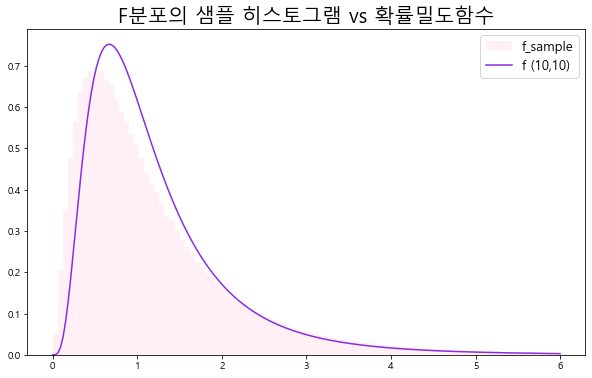

In [343]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1,n2)
xs = np.linspace(0,6,200)

ax.hist(f_sample,bins=100,range=(0,6), density=True, label = 'f_sample', color='lavenderblush')
ax.plot(xs, rv.pdf(xs) ,label=f'f ({n1},{n2})', color = 'blueviolet')
ax.legend(fontsize=13)
ax.set_title('F분포의 샘플 히스토그램 vs 확률밀도함수',fontsize=20)


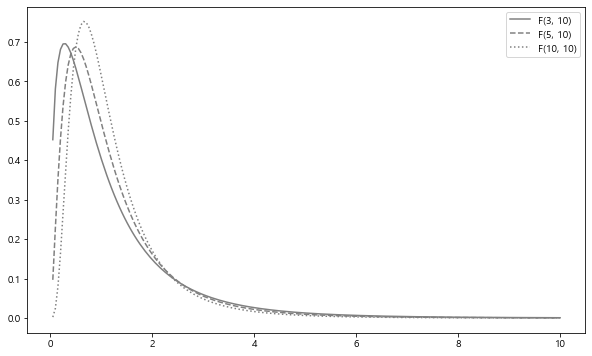

In [351]:
#n2를 10으로 고정하고 n1을 3,5,10으로 변화시킬 떄 분포 형태를 시각화하여 비교하라

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 10, 200)[1:]
for n1, ls in zip([3,5,10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs), 
           label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()


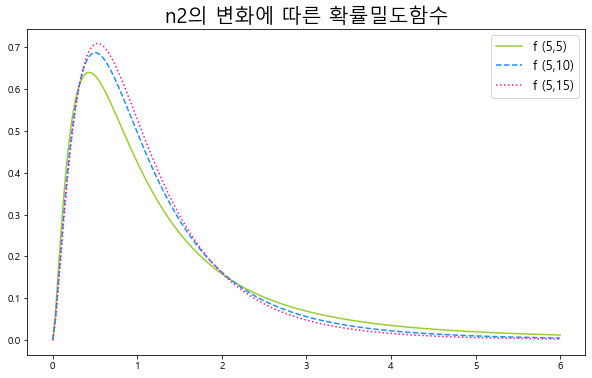

In [348]:
#n1을 5로 고정하고 n2를 5,10,15로 변화시킬 때 분포 형태를 시각화하여 비교
plt.figure(figsize=(10,6))
color = ['yellowgreen','dodgerblue','deeppink']
xs = np.linspace(0,6,200)
for n2,ls,color in zip([5,10,15],linestyles,color):
    rv = stats.f(5,n2)
    plt.plot(xs,rv.pdf(xs),label=f'f (5,{n2})',ls=ls,color=color)
plt.legend(fontsize=13)
plt.title('n2의 변화에 따른 확률밀도함수',fontsize=20)
plt.show()



In [321]:
# [개인연습]영풍전자의 주가 수익률은 평균0.15, 분산 0.0025의 정규분포를 따른다
# 주가 수익률이 25%이상일 확률은?
rv= stats.norm(loc=0.15,scale=0.05)
1 - rv.cdf(0.25)

0.02275013194817921

In [326]:
#주가 수익률이 0.05에서 0.25사이일 확률
rv.interval(0.70)

(0.0981783305253105, 0.2018216694746895)

In [329]:
# 주가수익률 -0.15이하일 확률
rv.isf(-0.15)

nan

In [336]:
# 형광등 수명시간 500시간 못미칠 확률은? 
# $lambda= 0.002
rv=stats.expon(scale=1/0.002)
rv.cdf(500)

0.6321205588285577

In [ ]:
# 평균과 분산
E(x)= 1/0.002
var(x)=1/(0.002**2)


In [339]:
rv.cdf(600)

0.6988057880877978